In [30]:
# Mathematical and Data Managment
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
from IPython.display import HTML
from functools import partial
from concurrent.futures import ProcessPoolExecutor
from tqdm import tqdm
import io
import os
from PIL import Image
from IPython.display import Image as IPImage
# Settings for plots
plt.rcParams['font.family'] = 'cmr10'
plt.rcParams['mathtext.fontset'] = 'cm'

#sns.set_style('white')

In [2]:
group_segregation = pd.read_pickle('/mnt/disk2/Data/Pickle/group_segregation_daily.pkl')
global_segregation = pd.read_pickle('/mnt/disk2/Data/Pickle/global_segregation_daily.pkl')
individual_segregation = pd.read_pickle('/mnt/disk2/Data/Pickle/individual_segregation_daily.pkl')

# Desagregated Measures (Group Level)

In [3]:
# Resetting index to make 'Date' a column for Seaborn's use
df = group_segregation.reset_index()
sin_inclasificados = df[df['Political Label'] != 'Sin Clasificar']

In [4]:
group_segregation.head()

Classic Freeman  Proximity to Others  \
Date       Political Label                                         
2021-04-28 Centro                  0.280228             0.649143   
           Derecha                 0.783453             0.333520   
           Izquierda               0.584722             0.464436   
           Sin Clasificar          0.234724             0.565012   
2021-04-29 Centro                  0.251280             0.611115   

                            Other's Proximity  \
Date       Political Label                      
2021-04-28 Centro                    1.127692   
           Derecha                   0.110682   
           Izquierda                 0.118508   
           Sin Clasificar            5.570244   
2021-04-29 Centro                    1.287488   

                            Proximity From Sin Clasificar To  \
Date       Political Label                                     
2021-04-28 Centro                                   0.902865   
           Derecha                                  0.595559   
           Izquierda                                0.493594   
           Sin Clasificar                           2.278725   
2021-04-29 Centro                                   1.171839   

                            Proximity From Izquierda To  \
Date       Political Label                                
2021-04-28 Centro                              1.344915   
           Derecha                             0.079959   
           Izquierda                           1.576697   
           Sin Clasificar                      0.438767   
2021-04-29 Centro                              1.656315   

                            Proximity From Centro To  \
Date       Political Label                             
2021-04-28 Centro                           4.748234   
           Derecha                          0.332125   
           Izquierda                        0.641653   
           Sin Clasificar                   0.887001   
2021-04-29 Centro                           5.405856   

                            Proximity From Derecha To  \
Date       Political Label                              
2021-04-28 Centro                            0.836248   
           Derecha                           4.055432   
           Izquierda                         0.056892   
           Sin Clasificar                    0.688755   
2021-04-29 Centro                            0.731949   

                            Proximity Sin Clasificar Took From  \
Date       Political Label                                       
2021-04-28 Centro                                     7.639779   
           Derecha                                    6.285360   
           Izquierda                                  4.936415   
           Sin Clasificar                             2.278725   
2021-04-29 Centro                                     7.638608   

                            Proximity Izquierda Took From  \
Date       Political Label                                  
2021-04-28 Centro                                0.491224   
           Derecha                               0.046146   
           Izquierda                             1.576697   
           Sin Clasificar                        0.043873   
2021-04-29 Centro                                0.475127   

                            Proximity Centro Took From  \
Date       Political Label                               
2021-04-28 Centro                             4.748234   
           Derecha                            0.886021   
           Izquierda                          1.756773   
           Sin Clasificar                     0.104825   
2021-04-29 Centro                             5.405856   

                            Proximity Derecha Took From  \
Date       Political Label                                
2021-04-28 Centro                              0.313467   
           Derecha                             4.055432   
           Izquie

In [5]:
group_segregation.tail()

Classic Freeman  Proximity to Others  \
Date       Political Label                                         
2021-06-28 Sin Clasificar          0.080194             0.522727   
2021-06-29 Centro                  0.332077             0.522028   
           Derecha                 0.702294             0.358218   
           Izquierda               0.659238             0.414139   
           Sin Clasificar          0.192430             0.554900   

                            Other's Proximity  \
Date       Political Label                      
2021-06-28 Sin Clasificar            7.471868   
2021-06-29 Centro                    1.188745   
           Derecha                   0.085002   
           Izquierda                 0.071636   
           Sin Clasificar            6.469847   

                            Proximity From Sin Clasificar To  \
Date       Political Label                                     
2021-06-28 Sin Clasificar                           1.871765   
2021-06-29 Centro                                   1.076037   
           Derecha                                  0.552536   
           Izquierda                                0.447717   
           Sin Clasificar                           1.862866   

                            Proximity From Izquierda To  \
Date       Political Label                                
2021-06-28 Sin Clasificar                      0.417936   
2021-06-29 Centro                              1.298735   
           Derecha                             0.066778   
           Izquierda                           1.850802   
           Sin Clasificar                      0.364895   

                            Proximity From Centro To  \
Date       Political Label                             
2021-06-28 Sin Clasificar                   0.638402   
2021-06-29 Centro                           6.169786   
           Derecha                          0.402716   
           Izquierda                        0.468844   
           Sin Clasificar                   0.644410   

                            Proximity From Derecha To  \
Date       Political Label                              
2021-06-28 Sin Clasificar                    0.535793   
2021-06-29 Centro                            1.243636   
           Derecha                           4.194847   
           Izquierda                         0.043800   
           Sin Clasificar                    0.514799   

                            Proximity Sin Clasificar Took From  \
Date       Political Label                                       
2021-06-28 Sin Clasificar                             1.871765   
2021-06-29 Centro                                     7.112341   
           Derecha                                    7.347177   
           Izquierda                                  5.976625   
           Sin Clasificar                             1.862866   

                            Proximity Izquierda Took From  \
Date       Political Label                                  
2021-06-28 Sin Clasificar                        0.022324   
2021-06-29 Centro                                0.315930   
           Derecha                               0.038165   
           Izquierda                             1.850802   
           Sin Clasificar                        0.027335   

                            Proximity Centro Took From  \
Date       Political Label                               
2021-06-28 Sin Clasificar                     0.107971   
2021-06-29 Centro                             6.169786   
           Derecha                            1.608148   
           Izquierda                          1.927342   
           Sin Clasificar                     0.097494   

                            Proximity Derecha Took From  \
Date       Political Label                                
2021-06-28 Sin Clasificar                      0.032311   
2021-06-29 Centro                              0.311434   
           Derech

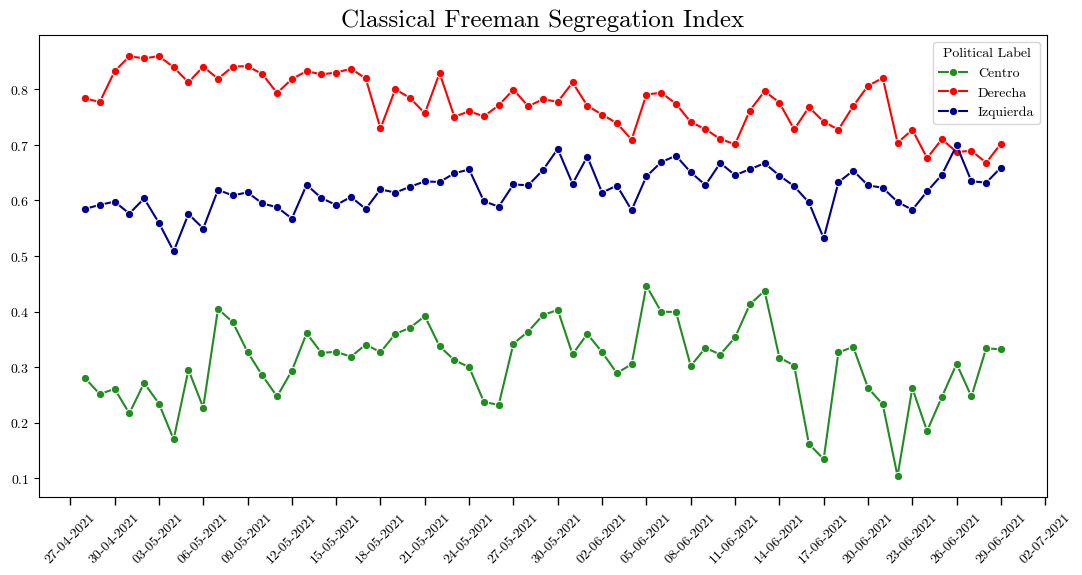

In [7]:
fig, ax = plt.subplots(figsize=(13, 6))
# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
# Plot
sns.lineplot(data=sin_inclasificados, x='Date', y='Classic Freeman', hue='Political Label',
             palette=["forestgreen", "red", "darkblue"], ax=ax, marker='o')

# Axes settings
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(axis='x', which='both', direction='out', length=6, width=1)

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Legend
plt.legend(title='Political Label', bbox_to_anchor=(1, 1), loc='best')

# Title
plt.title('Classical Freeman Segregation Index', fontsize=18)

plt.show()

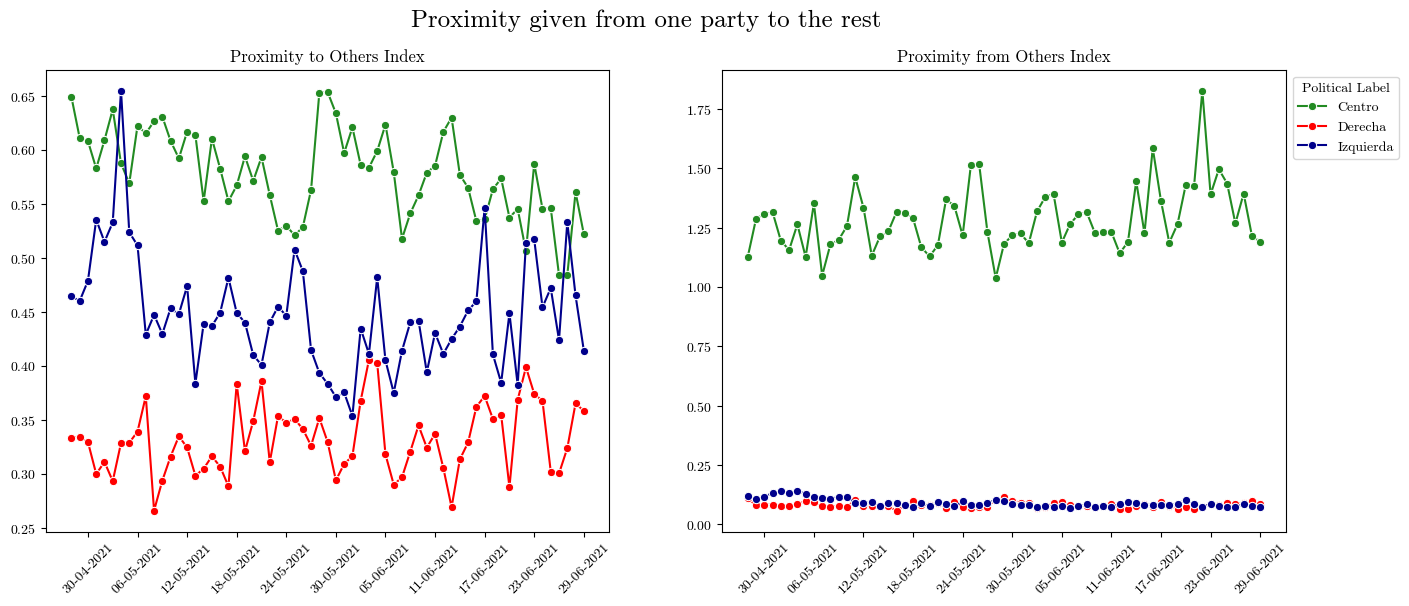

In [8]:
fig, axes = plt.subplots(1,2,figsize=(16, 6))  # Increased size from (12,5) to (16,8)
# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
# Plot
sns.lineplot(data=sin_inclasificados, x='Date', y='Proximity to Others', hue='Political Label',
             palette=["forestgreen", "red", "darkblue"], ax=axes[0], marker='o', legend = False)

sns.lineplot(data=sin_inclasificados, x='Date', y="Other's Proximity", hue='Political Label',
             palette=["forestgreen", "red", "darkblue"], ax=axes[1], marker='o')

# Axes settings Proximity to Others
for ax in axes:
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=6))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax.tick_params(axis = 'x', rotation = 45)
    ax.set_ylabel('')
    ax.set_xlabel('')
    #ax.set_ylim(0,0.5)

axes[0].set_title('Proximity to Others Index')
axes[1].set_title('Proximity from Others Index')

# Legend
plt.legend(title='Political Label', bbox_to_anchor=(1, 1), loc='best')

# Title
plt.suptitle('Proximity given from one party to the rest', fontsize=18)

plt.show()

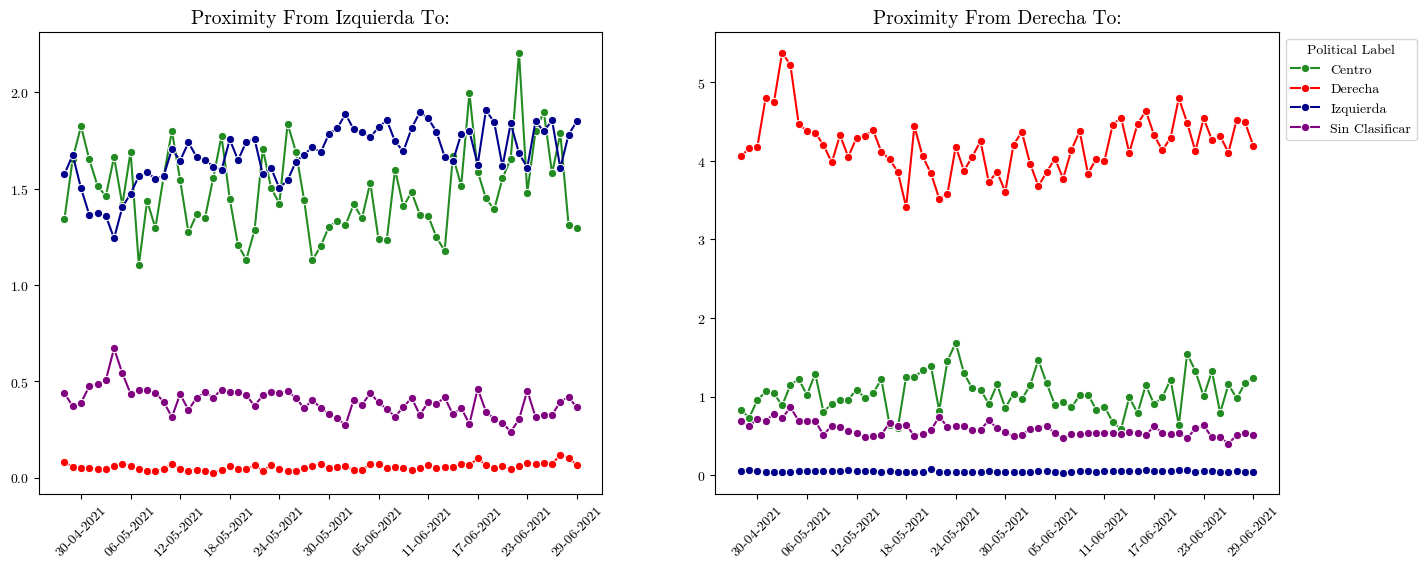

In [9]:
fig, axes = plt.subplots(1,2,figsize=(16, 6))  # Increased size from (12,5) to (16,8)
# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
# Plot
sns.lineplot(data=df, x='Date', y='Proximity From Izquierda To', hue='Political Label',
             palette=["forestgreen", "red", "darkblue", "purple"], ax=axes[0], marker='o', legend = False)

sns.lineplot(data=df, x='Date', y="Proximity From Derecha To", hue='Political Label',
             palette=["forestgreen", "red", "darkblue", "purple"], ax=axes[1], marker='o')

# Axes settings
for ax in axes:
    # Better readability of X axis
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=6))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax.tick_params(axis = 'x', rotation = 45)
    
    # Unnecesarry Titles
    ax.set_ylabel('')
    ax.set_xlabel('')
    
    # Set limits for indexes
    #ax.set_ylim(0,1.5)
    #ax.axhline(y=1, color='gray', linestyle='--', linewidth=1, alpha=0.7)

axes[0].set_title('Proximity From Izquierda To:', fontsize=14)
axes[1].set_title('Proximity From Derecha To:', fontsize=14)

# Legend
plt.legend(title='Political Label', bbox_to_anchor=(1, 1), loc='best')

plt.show()

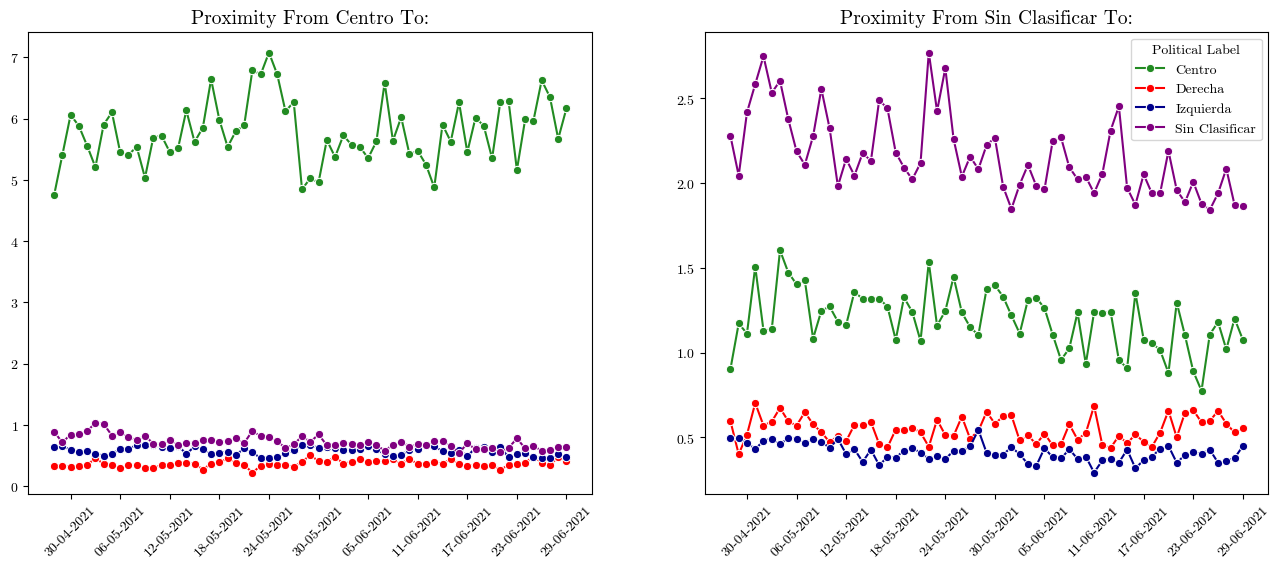

In [10]:
fig, axes = plt.subplots(1,2,figsize=(16, 6))  # Increased size from (12,5) to (16,8)
# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
# Plot
sns.lineplot(data=df, x='Date', y='Proximity From Centro To', hue='Political Label',
             palette=["forestgreen", "red", "darkblue", "purple"], ax=axes[0], marker='o', legend = False)

sns.lineplot(data=df, x='Date', y="Proximity From Sin Clasificar To", hue='Political Label',
             palette=["forestgreen", "red", "darkblue", "purple"], ax=axes[1], marker='o')

# Axes settings
for ax in axes:
    # Better readability of X axis
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=6))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax.tick_params(axis = 'x', rotation = 45)
    
    # Unnecesarry Titles
    ax.set_ylabel('')
    ax.set_xlabel('')
    
    # Set limits for indexes
    #ax.set_ylim(0,0.6)
    #ax.axhline(y=1, color='gray', linestyle='--', linewidth=1, alpha=0.7)

axes[0].set_title('Proximity From Centro To:', fontsize=14)
axes[1].set_title('Proximity From Sin Clasificar To:', fontsize=14)

# Legend
plt.legend(title='Political Label', bbox_to_anchor=(1, 1), loc='best')

plt.show()

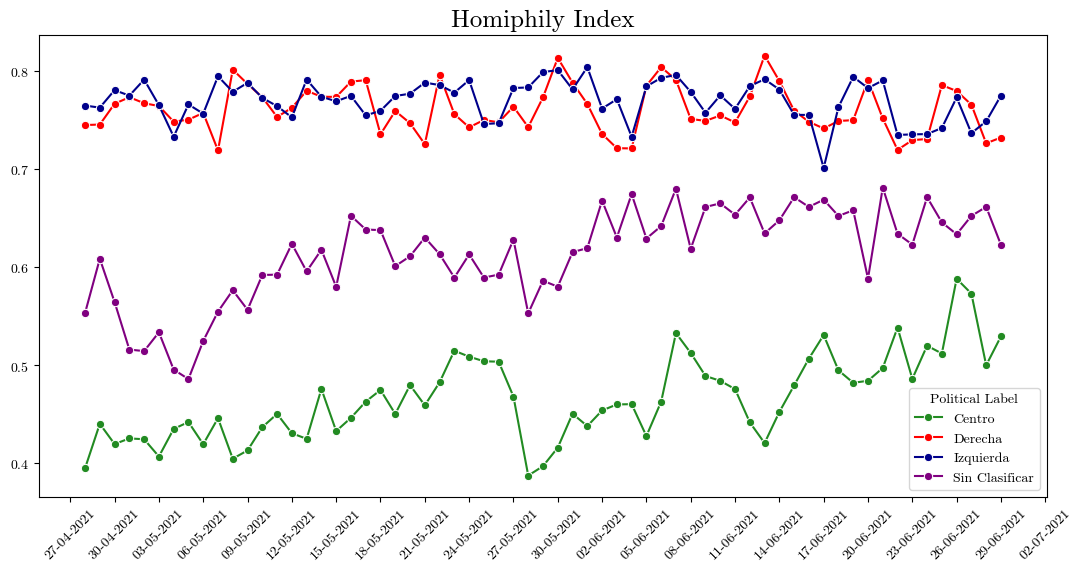

In [11]:
fig, ax = plt.subplots(figsize=(13, 6))  # Increased size from (12,5) to (16,8)
# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
# Plot
sns.lineplot(data=df, x='Date', y='Homiphily Index', hue='Political Label',
             palette=["forestgreen", "red", "darkblue", "purple"], ax=ax, marker='o')

# Axes settings
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.set_ylabel('')
ax.set_xlabel('')

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Legend
#plt.legend(title='Political Label', bbox_to_anchor=(1, 1), loc='best')

# Title
plt.title('Homiphily Index', fontsize=18)

plt.show()

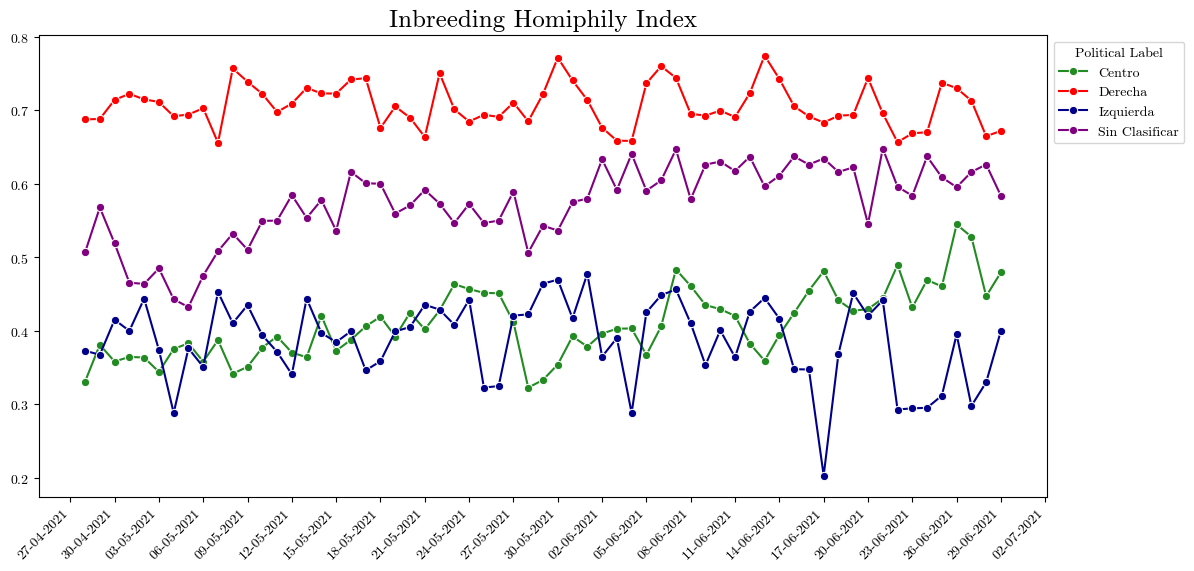

In [12]:
fig, ax = plt.subplots(figsize=(13, 6))  # Increased size from (12,5) to (16,8)
# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
# Plot
sns.lineplot(data=df, x='Date', y='Inbreeding Homiphily Index', hue='Political Label',
             palette=["forestgreen", "red", "darkblue", "purple"], ax=ax, marker='o')

# Axes settings
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.set_ylabel('')
ax.set_xlabel('')

# Rotate x-ticks for better readability
plt.xticks(rotation=45, ha = 'right')

# Legend
plt.legend(title='Political Label', bbox_to_anchor=(1, 1), loc='best')

# Title
plt.title('Inbreeding Homiphily Index', fontsize=18)

plt.show()

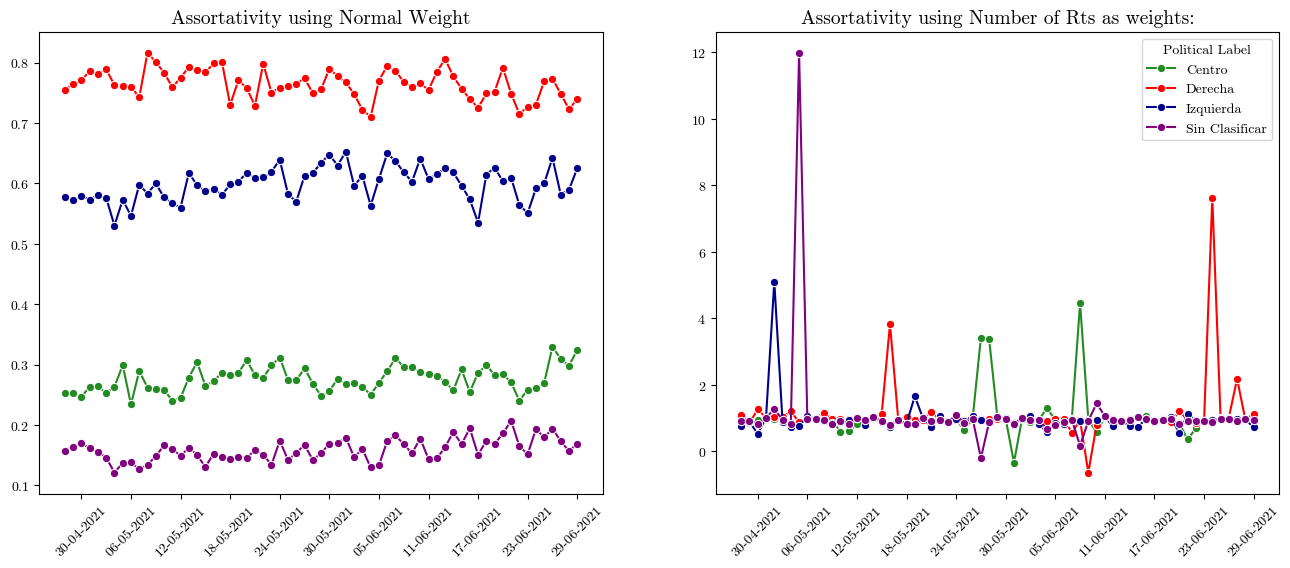

In [13]:
fig, axes = plt.subplots(1,2,figsize=(16, 6))  # Increased size from (12,5) to (16,8)
# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
# Plot
sns.lineplot(data=df, x='Date', y='Normal Weighted Assortativity', hue='Political Label',
             palette=["forestgreen", "red", "darkblue", "purple"], ax=axes[0], marker='o', legend = False)

sns.lineplot(data=df, x='Date', y="Weighted Assortativity", hue='Political Label',
             palette=["forestgreen", "red", "darkblue", "purple"], ax=axes[1], marker='o')

# Axes settings
for ax in axes:
    # Better readability of X axis
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=6))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax.tick_params(axis = 'x', rotation = 45)
    
    # Unnecesarry Titles
    ax.set_ylabel('')
    ax.set_xlabel('')
    
    # Set limits for indexes
    #ax.set_ylim(0,0.6)
    #ax.axhline(y=1, color='gray', linestyle='--', linewidth=1, alpha=0.7)

axes[0].set_title('Assortativity using Normal Weight', fontsize=14)
axes[1].set_title('Assortativity using Number of Rts as weights:', fontsize=14)

# Legend
plt.legend(title='Political Label', bbox_to_anchor=(1, 1), loc='best')

plt.show()

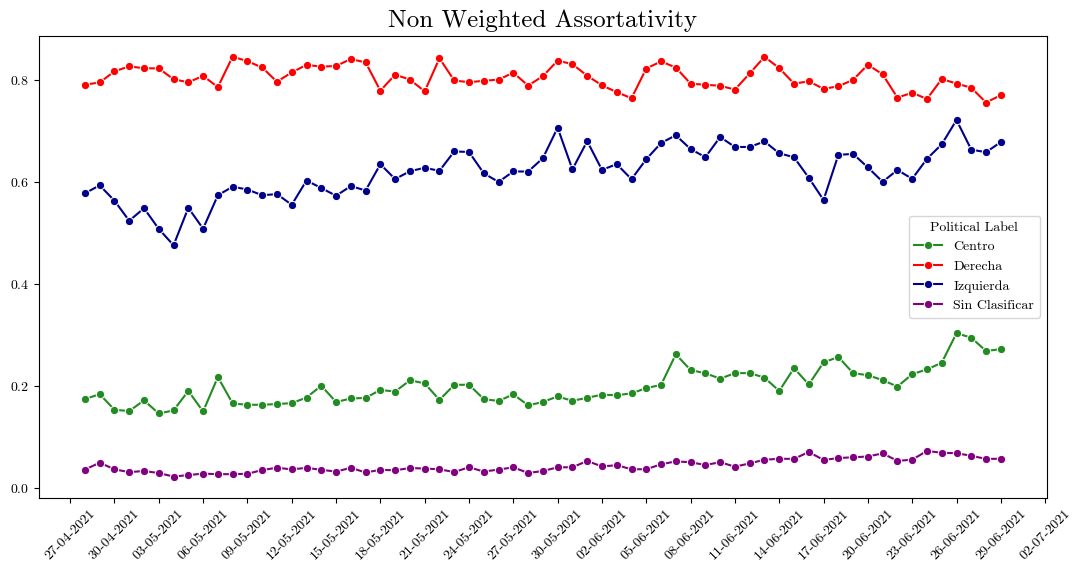

In [14]:
fig, ax = plt.subplots(figsize=(13, 6))  # Increased size from (12,5) to (16,8)
# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
# Plot
sns.lineplot(data=df, x='Date', y='Non Weighted Assortativity', hue='Political Label',
             palette=["forestgreen", "red", "darkblue", "purple"], ax=ax, marker='o')

# Axes settings
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.set_ylabel('')
ax.set_xlabel('')

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Legend
#plt.legend(title='Political Label', bbox_to_anchor=(1, 1), loc='best')

# Title
plt.title('Non Weighted Assortativity', fontsize=18)

plt.show()

# Global Measures

In [14]:
global_segregation.head()

Freeman Global  Normal Weighted Assortativity  \
2021-04-28        0.537315                       0.501600   
2021-04-29        0.548880                       0.508322   
2021-04-30        0.561385                       0.511913   
2021-05-01        0.550820                       0.511692   
2021-05-02        0.524167                       0.493515   

            Weighted Assortativity  Non Weighted Assortativity  
2021-04-28                1.182048                    0.501394  
2021-04-29                0.997113                    0.489940  
2021-04-30                0.947548                    0.484228  
2021-05-01               -1.844281                    0.467010  
2021-05-02                0.792956                    0.449811

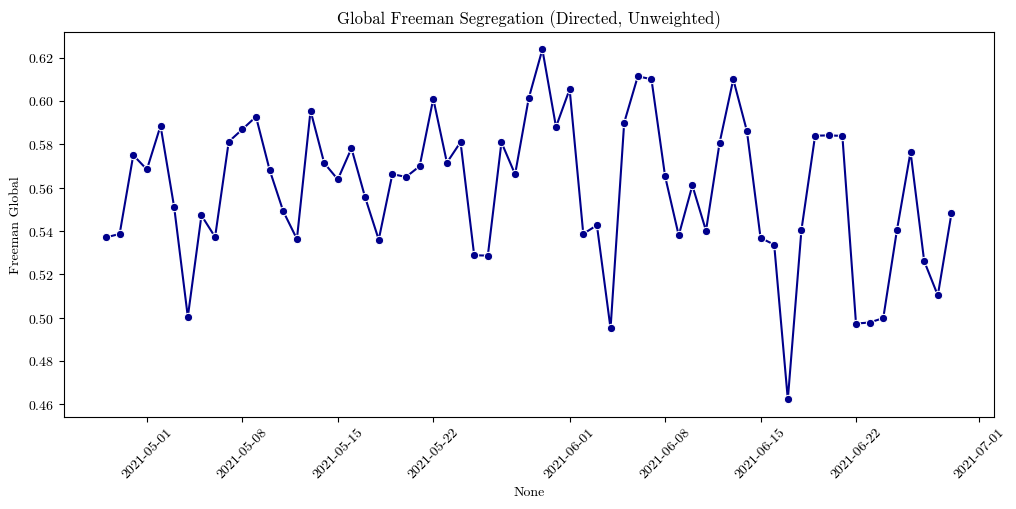

In [15]:
# Plotting using Seaborn with different colors for each category
fig, ax = plt.subplots(figsize = (12,5))
sns.lineplot(global_segregation, x = global_segregation.index, y ='Freeman Global', errorbar=None, ax =ax, marker='o', color = 'darkblue')
# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.xticks(rotation=45)
plt.title('Global Freeman Segregation (Directed, Unweighted)')
#plt.savefig("../Results/Global_Freeman_Unweighted.png")
plt.show()

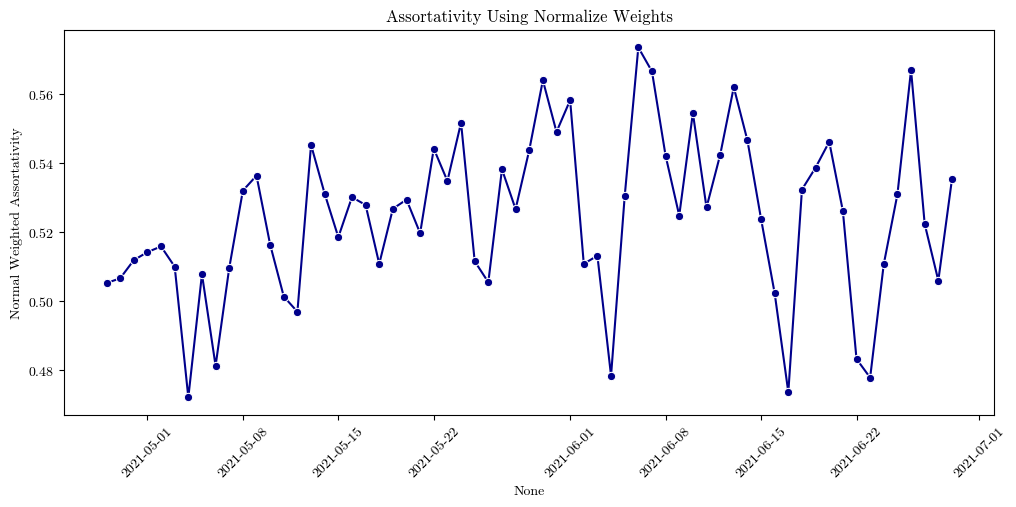

In [16]:
# Plotting using Seaborn with different colors for each category
fig, ax = plt.subplots(figsize = (12,5))
sns.lineplot(global_segregation, x = global_segregation.index, y ='Normal Weighted Assortativity', errorbar=None, ax =ax, marker='o', color = 'darkblue')
# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.xticks(rotation=45)
plt.title('Assortativity Using Normalize Weights')
#plt.savefig("../Results/Global_Freeman_Unweighted.png")
plt.show()

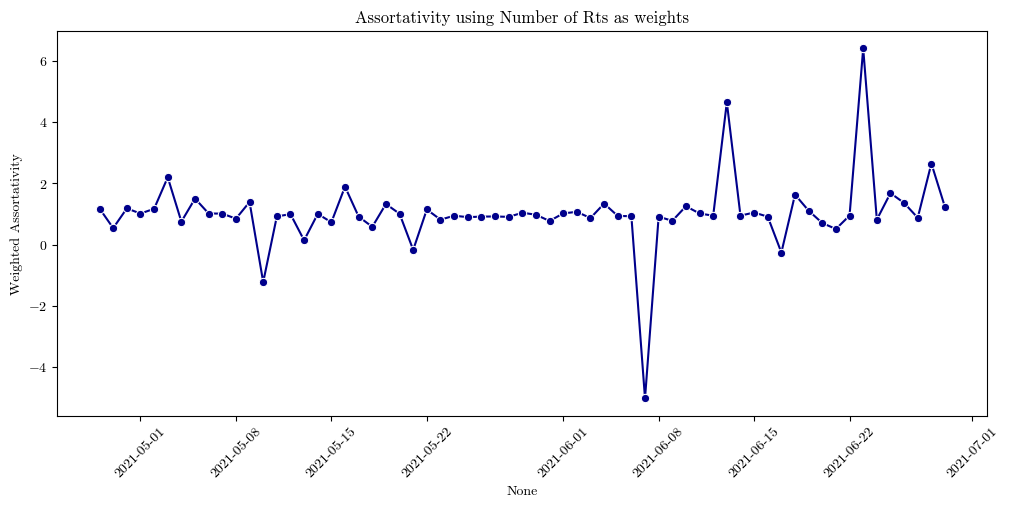

In [17]:
# Plotting using Seaborn with different colors for each category
fig, ax = plt.subplots(figsize = (12,5))
sns.lineplot(global_segregation, x = global_segregation.index, y ='Weighted Assortativity', errorbar=None, ax =ax, marker='o', color = 'darkblue')
# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.xticks(rotation=45)
plt.title('Assortativity using Number of Rts as weights')
#plt.savefig("../Results/Global_Freeman_Unweighted.png")
plt.show()

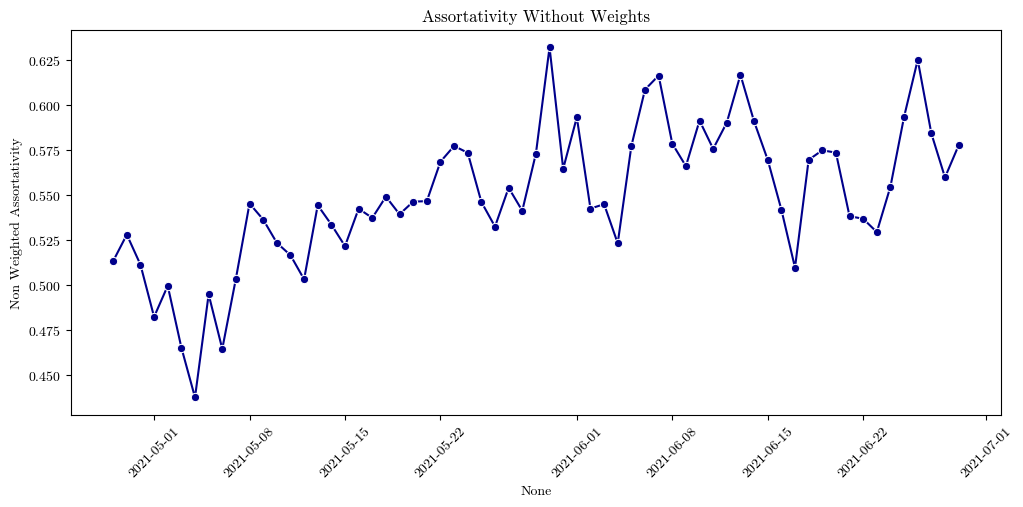

In [18]:
# Plotting using Seaborn with different colors for each category
fig, ax = plt.subplots(figsize = (12,5))
sns.lineplot(global_segregation, x = global_segregation.index, y ='Non Weighted Assortativity', errorbar=None, ax =ax, marker='o', color = 'darkblue')
# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.xticks(rotation=45)
plt.title('Assortativity Without Weights')
#plt.savefig("../Results/Global_Freeman_Unweighted.png")
plt.show()

# Study Event-like Plots

In [20]:
def study_event_df(group_segregation: pd.DataFrame, event:str, seg_index:str):
    # Study Event DataFrame (Like the group segregation but empty)
    study_events = group_segregation.copy()[[]].sort_index()
    
    # Get fixed values
    event_seg = group_segregation.loc[event, seg_index]
    event_seg = event_seg.to_dict()
    event_date = datetime.strptime(event, '%Y-%m-%d')
    
    # Get Days (X axis)
    study_events[f"days_from_{event}"] = group_segregation.index.get_level_values('Date') - event_date
    study_events[f"days_from_{event}"] = study_events[f"days_from_{event}"].dt.days
    
    # Get Segregation (Y axis)
    study_events['Segregation Deviation %'] = group_segregation.index.get_level_values('Political Label').map(event_seg)
    study_events['Segregation Deviation %'] = (group_segregation[seg_index] - study_events['Segregation Deviation %']) / study_events['Segregation Deviation %'] 
    
    # Prepare df
    study_events.reset_index(inplace=True)
    study_events.drop(columns='Date', inplace=True)

    return study_events, event

study_event_df(group_segregation,'2021-05-12', 'Classic Freeman')[0]

Political Label  days_from_2021-05-12  Segregation Deviation %
0            Centro                   -14                -0.045671
1           Derecha                   -14                -0.042857
2         Izquierda                   -14                 0.030468
3    Sin Clasificar                   -14                 0.162782
4            Centro                   -13                -0.144256
..              ...                   ...                      ...
247  Sin Clasificar                    47                -0.602736
248          Centro                    48                 0.130904
249         Derecha                    48                -0.142009
250       Izquierda                    48                 0.161789
251  Sin Clasificar                    48                -0.046736

[252 rows x 3 columns]

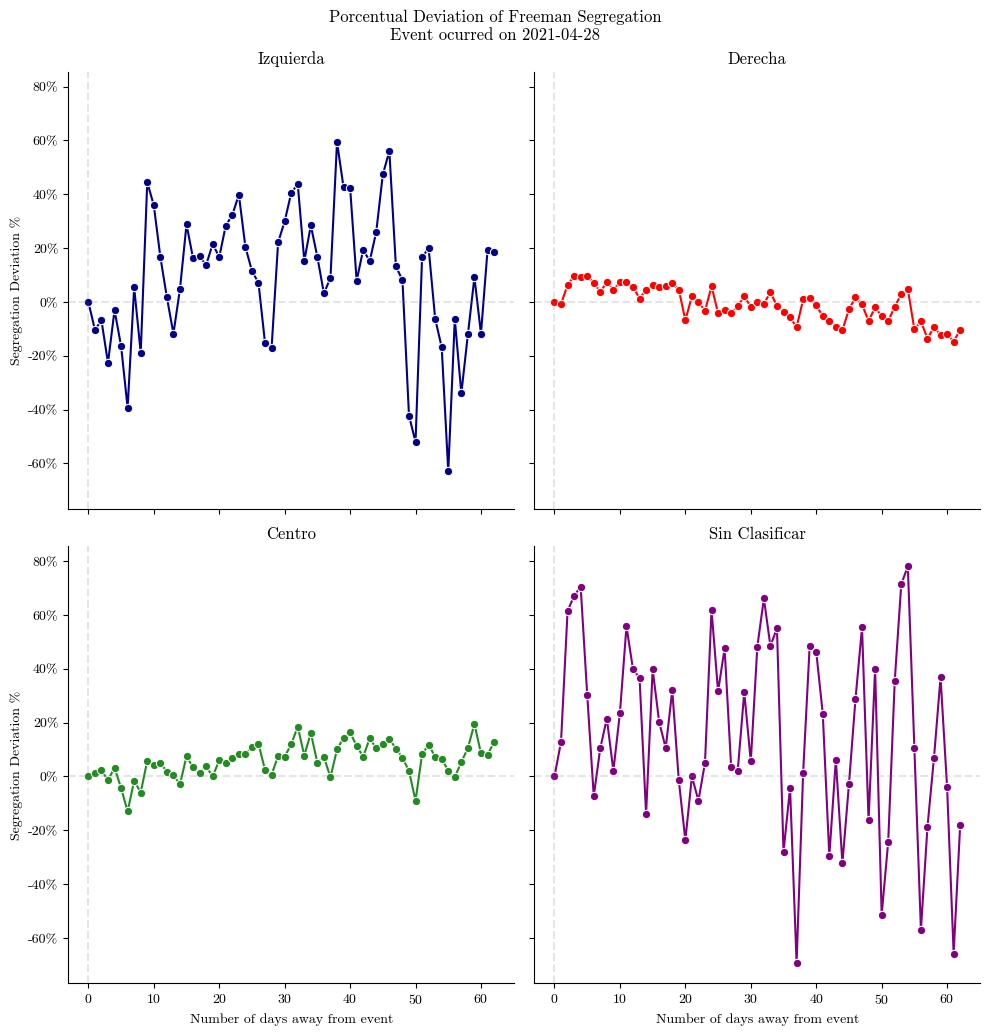

In [21]:
date = '2021-04-28'
categories = ['Izquierda', 'Derecha', 'Centro', 'Sin Clasificar']
study_events, starting_date = study_event_df(group_segregation, date, 'Classic Freeman')

# Plotting using Seaborn with different colors for each category
plot = sns.relplot(data = study_events, kind = 'line', marker='o',
            x = f'days_from_{starting_date}', y ='Segregation Deviation %',
            col='Political Label', hue='Political Label', col_wrap = 2,
            palette = ["darkblue", "red", "forestgreen", "purple"], legend=False)

# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
percentage_formatter = FuncFormatter(lambda x, pos: f'{x*100:.0f}%')

for ax, pol in zip(plot.axes.flatten(), categories):
    ax.axvline(x=0, color='gray', linestyle='--', alpha=0.2)
    ax.axhline(y=0, color='gray', linestyle='--', alpha=0.2)
    ax.set_xlabel('Number of days away from event')
    ax.set_title(pol)
    ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

title_font = {'size': 40, 'weight': 'bold'}
plot.figure.suptitle("Porcentual Deviation of Freeman Segregation", y=1.03, fontdict=title_font)
subtitle_font = {'size': 12, 'weight': 'normal', 'style': 'italic'}
plot.figure.text(0.5, 1, f"Event ocurred on {starting_date}", ha='center', fontdict=subtitle_font)
#plt.savefig(f"../Results/Event_Study_Freeman_{starting_date}.png")
plt.show()

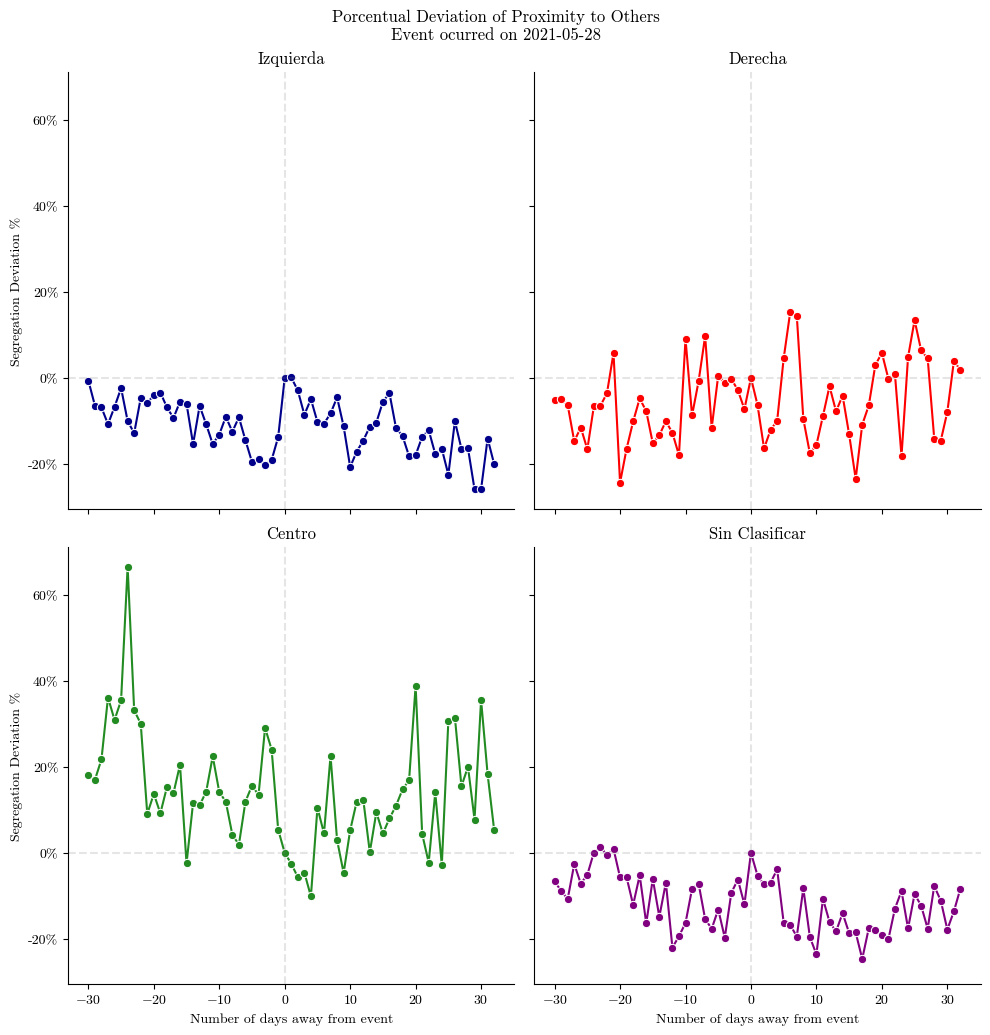

In [22]:
date = '2021-05-28'
categories = ['Izquierda', 'Derecha', 'Centro', 'Sin Clasificar']
study_events, starting_date = study_event_df(group_segregation, date, 'Proximity to Others')

# Plotting using Seaborn with different colors for each category
plot = sns.relplot(data = study_events, kind = 'line', marker='o',
            x = f'days_from_{starting_date}', y ='Segregation Deviation %',
            col='Political Label', hue='Political Label', col_wrap = 2,
            palette = ["darkblue", "red", "forestgreen", "purple"], legend=False)

# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
percentage_formatter = FuncFormatter(lambda x, pos: f'{x*100:.0f}%')

for ax, pol in zip(plot.axes.flatten(), categories):
    ax.axvline(x=0, color='gray', linestyle='--', alpha=0.2)
    ax.axhline(y=0, color='gray', linestyle='--', alpha=0.2)
    ax.set_xlabel('Number of days away from event')
    ax.set_title(pol)
    ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

title_font = {'size': 40, 'weight': 'bold'}
plot.figure.suptitle("Porcentual Deviation of Proximity to Others", y=1.03, fontdict=title_font)
subtitle_font = {'size': 12, 'weight': 'normal', 'style': 'italic'}
plot.figure.text(0.5, 1, f"Event ocurred on {starting_date}", ha='center', fontdict=subtitle_font)
#plt.savefig(f"../Results/Event_Study_Freeman_{starting_date}.png")

plt.show()

In [62]:
df = individual_segregation.reset_index()
df_filter = df[df['Political Label'] == 'Izquierda']
# Set up the figure and axis for the animation
fig, ax = plt.subplots()
cols = df_filter.columns[2:-1]
# Initial plot (to set up the view limits)
sns.histplot(df_filter[cols[0]], kde=False, ax=ax, color="darkblue", bins=20, alpha = 0.5)
ax.set_xlim(-0.1,2.5)
ax.set_ylim(0,20000)
ax.clear()  # Clear the axis to remove the initial plot
plt.rcParams['axes.formatter.use_mathtext'] = True
def update(frame):
    ax.clear()  # Clear the current histogram
    sns.histplot(df_filter[cols[frame]], kde=False, ax=ax, color="darkblue", bins=20, alpha = 0.5)
    ax.set_xlim(-0.1,2.5),(0,22500)
    ax.set_ylim(0,22500)
    plt.rcParams['axes.formatter.use_mathtext'] = True
plt.close()
# Create the animation
anim = FuncAnimation(fig, update, frames=range(len(cols)), repeat=False)
anim.save('histogram_izquierda.mp4', fps=1, extra_args=['-vcodec', 'libx264'])
# Display the animation
HTML(anim.to_jshtml())

In [63]:
df = individual_segregation.reset_index()
df_filter = df[df['Political Label'] == 'Derecha']
# Set up the figure and axis for the animation
fig, ax = plt.subplots()
cols = df_filter.columns[2:-1]
# Initial plot (to set up the view limits)
sns.histplot(df_filter[cols[0]], kde=False, ax=ax, color="red", bins=20, alpha = 0.5)
ax.set_xlim(-0.1,7)
ax.set_ylim(0,32000)
ax.clear()  # Clear the axis to remove the initial plot
plt.rcParams['axes.formatter.use_mathtext'] = True
def update(frame):
    ax.clear()  # Clear the current histogram
    sns.histplot(df_filter[cols[frame]], kde=False, ax=ax, color="red", bins=20, alpha = 0.5)
    ax.set_xlim,(-0.1,7),(0,32000)
    ax.set_ylim(0,32000)
    plt.rcParams['axes.formatter.use_mathtext'] = True
plt.close()
# Create the animation
anim = FuncAnimation(fig, update, frames=range(len(cols)), repeat=False)

# Display the animation
HTML(anim.to_jshtml())

In [60]:
df = individual_segregation.reset_index()
df_filter = df[df['Political Label'] == 'Centro']
# Set up the figure and axis for the animation
fig, ax = plt.subplots()
cols = df_filter.columns[2:-1]
# Initial plot (to set up the view limits)
sns.histplot(df_filter[cols[0]], kde=False, ax=ax, color="forestgreen", bins=20, alpha = 0.5)
ax.set_xlim(-0.1,7)
ax.set_ylim(0,25000)
ax.clear()  # Clear the axis to remove the initial plot
plt.rcParams['axes.formatter.use_mathtext'] = True
def update(frame):
    ax.clear()  # Clear the current histogram
    sns.histplot(df_filter[cols[frame]], kde=False, ax=ax, color="forestgreen", bins=20, alpha = 0.5)
    ax.set_xlim,(-0.1,14),(0,30000)
    ax.set_ylim(0,30000)
    plt.rcParams['axes.formatter.use_mathtext'] = True
plt.close()
# Create the animation
anim = FuncAnimation(fig, update, frames=range(len(cols)), repeat=False)

# Display the animation
HTML(anim.to_jshtml())

In [46]:
individual_segregation

Proximity index on 2021-04-28  \
Node  Political Label                                  
0     Centro                                     0.0   
      Derecha                                    0.0   
      Izquierda                                  0.0   
      Sin Clasificar                             0.0   
1     Centro                                     0.0   
...                                              ...   
36962 Sin Clasificar                             0.0   
36963 Centro                                     0.0   
      Derecha                                    0.0   
      Izquierda                                  0.0   
      Sin Clasificar                             0.0   

                       Proximity index on 2021-04-29  \
Node  Political Label                                  
0     Centro                                     0.0   
      Derecha                                    0.0   
      Izquierda                                  0.0   
      Sin Clasificar                             0.0   
1     Centro                                     0.0   
...                                              ...   
36962 Sin Clasificar                             0.0   
36963 Centro                                     0.0   
      Derecha                                    0.0   
      Izquierda                                  0.0   
      Sin Clasificar                             0.0   

                       Proximity index on 2021-04-30  \
Node  Political Label                                  
0     Centro                                     0.0   
      Derecha                                    0.0   
      Izquierda                                  0.0   
      Sin Clasificar                             0.0   
1     Centro                                     0.0   
...                                              ...   
36962 Sin Clasificar                             0.0   
36963 Centro                                     0.0   
      Derecha                                    0.0   
      Izquierda                                  0.0   
      Sin Clasificar                             0.0   

                       Proximity index on 2021-05-01  \
Node  Political Label                                  
0     Centro                                0.000000   
      Derecha                               0.000000   
      Izquierda                             0.000000   
      Sin Clasificar                        0.000000   
1     Centro                                6.350988   
...                                              ...   
36962 Sin Clasificar                        0.000000   
36963 Centro                                0.000000   
      Derecha                               0.000000   
      Izquierda                             0.000000   
      Sin Clasificar                        0.000000   

                       Proximity index on 2021-05-02  \
Node  Political Label                                  
0     Centro                                     0.0   
      Derecha                                    0.0   
      Izquierda                                  0.0   
      Sin Clasificar                             0.0   
1     Centro                                     0.0   
...                                              ...   
36962 Sin Clasificar                             0.0   
36963 Centro                                     0.0   
      Derecha                                    0.0   
      Izquierda                                  0.0   
      Sin Clasificar                             0.0   

                       Proximity index on 2021-05-03  \
Node  Political Label                                  
0     Centro                                     0.0   
      Derecha                                    0.0   
      Izquierda                                  0.0   
      Sin Clasificar                             0.0   
1     Centro                              

In [67]:
df = individual_segregation.reset_index()
df_filter = df[df['Political Label'] == 'Izquierda']
df_filter

Node Political Label  Proximity index on 2021-04-28  \
2           0       Izquierda                       0.000000   
6           1       Izquierda                       0.000000   
10          2       Izquierda                       0.000000   
14          3       Izquierda                       1.607718   
18          4       Izquierda                       1.793601   
...       ...             ...                            ...   
147838  36959       Izquierda                       0.000000   
147842  36960       Izquierda                       0.000000   
147846  36961       Izquierda                       0.000000   
147850  36962       Izquierda                       0.000000   
147854  36963       Izquierda                       0.000000   

        Proximity index on 2021-04-29  Proximity index on 2021-04-30  \
2                            0.000000                       0.000000   
6                            0.982362                       1.528836   
10                           1.964725                       0.611534   
14                           1.473544                       1.362848   
18                           1.695057                       1.599398   
...                               ...                            ...   
147838                       0.000000                       0.000000   
147842                       0.000000                       0.000000   
147846                       0.000000                       0.000000   
147850                       0.000000                       0.000000   
147854                       0.000000                       0.000000   

        Proximity index on 2021-05-01  Proximity index on 2021-05-02  \
2                            0.000000                       0.000000   
6                            1.648563                       1.340837   
10                           0.591792                       0.000000   
14                           1.309703                       1.349488   
18                           1.591138                       1.594453   
...                               ...                            ...   
147838                       0.000000                       1.743089   
147842                       0.000000                       0.000000   
147846                       0.000000                       0.000000   
147850                       0.000000                       1.743089   
147854                       0.000000                       1.162059   

        Proximity index on 2021-05-03  Proximity index on 2021-05-04  \
2                            0.000000                       0.000000   
6                            1.149884                       0.987692   
10                           0.000000                       0.000000   
14                           1.363040                       1.444843   
18                           1.607001                       1.676331   
...                               ...                            ...   
147838                       1.179368                       1.212955   
147842                       0.000000                       0.000000   
147846                       0.000000                       0.000000   
147850                       1.048327                       1.198163   
147854                       0.972979                       0.963229   

        Proximity index on 2021-05-05  ...  Proximity index on 2021-06-18  \
2                            0.000000  ...                       0.000000   
6                            1.080565  ...                       1.326174   
10                           0.000000  ...                       0.000000   
14                           1.488446  ...                       2.320805   
18                           1.716091  ...                       0.000000   
...                               ...  ...                            ...   
147838                       1.284150  ...                       2.320805   
147842                       

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io

def save_to_pil(frame):
    df = individual_segregation.reset_index()
    df_filter = df[df['Political Label'] == 'Centro']
    cols = df_filter.columns[2:]
    fig, ax = plt.subplots()
    column = cols[frame]
    sns.histplot(df_filter[cols[frame]], kde=False, ax=ax, color="forestgreen", bins=20, alpha = 0.5)
    ax.set_xlim(-0.1,14)
    ax.set_ylim(0,30000)
    plt.close()
    
    # Save the matplotlib figure to a PIL Image object
    buf = io.BytesIO()
    fig.savefig(buf, format='jpg')
    buf.seek(0)
    hist = Image.open(buf)
    
    return column, hist

def main():
    with ProcessPoolExecutor() as executor:
        images = list(tqdm(executor.map(save_to_pil, range(63)), total=63))
    return images

if __name__=='__main__':
    images = main()
    hist_list = [x[1] for x in sorted(images, key=lambda x: x[0])]
    hist_list[0].save('XD.gif',
                        save_all=True, append_images=hist_list[1:], optimize=False, duration=250, loop=0)

100%|██████████| 63/63 [00:01<00:00, 34.89it/s]


In [25]:
individual_segregation

Proximity index on 2021-04-28  \
Node  Political Label                                  
0     Centro                                     NaN   
      Derecha                                    NaN   
      Izquierda                                  NaN   
      Sin Clasificar                             NaN   
1     Centro                                     NaN   
...                                              ...   
36962 Sin Clasificar                             NaN   
36963 Centro                                     NaN   
      Derecha                                    NaN   
      Izquierda                                  NaN   
      Sin Clasificar                             NaN   

                       Proximity index on 2021-04-29  \
Node  Political Label                                  
0     Centro                                     NaN   
      Derecha                                    NaN   
      Izquierda                                  NaN   
      Sin Clasificar                             NaN   
1     Centro                                     NaN   
...                                              ...   
36962 Sin Clasificar                             NaN   
36963 Centro                                     NaN   
      Derecha                                    NaN   
      Izquierda                                  NaN   
      Sin Clasificar                             NaN   

                       Proximity index on 2021-04-30  \
Node  Political Label                                  
0     Centro                                     NaN   
      Derecha                                    NaN   
      Izquierda                                  NaN   
      Sin Clasificar                             NaN   
1     Centro                                     NaN   
...                                              ...   
36962 Sin Clasificar                             NaN   
36963 Centro                                     NaN   
      Derecha                                    NaN   
      Izquierda                                  NaN   
      Sin Clasificar                             NaN   

                       Proximity index on 2021-05-01  \
Node  Political Label                                  
0     Centro                                     NaN   
      Derecha                                    NaN   
      Izquierda                                  NaN   
      Sin Clasificar                             NaN   
1     Centro                                6.350988   
...                                              ...   
36962 Sin Clasificar                             NaN   
36963 Centro                                     NaN   
      Derecha                                    NaN   
      Izquierda                                  NaN   
      Sin Clasificar                             NaN   

                       Proximity index on 2021-05-02  \
Node  Political Label                                  
0     Centro                                     NaN   
      Derecha                                    NaN   
      Izquierda                                  NaN   
      Sin Clasificar                             NaN   
1     Centro                                     0.0   
...                                              ...   
36962 Sin Clasificar                             NaN   
36963 Centro                                     NaN   
      Derecha                                    NaN   
      Izquierda                                  NaN   
      Sin Clasificar                             NaN   

                       Proximity index on 2021-05-03  \
Node  Political Label                                  
0     Centro                                     NaN   
      Derecha                                    NaN   
      Izquierda                                  NaN   
      Sin Clasificar                             NaN   
1     Centro                              

In [48]:
def plot_hist(col, df):
    result = [col]
    for cat in [('Izquierda','darkblue',(-0.1,2.5),(0,22500)), ('Derecha','red',(-0.1,7),(0,32000)), ('Centro','forestgreen',(-0.1,14),(0,30000))]:
        df_filter = df[df['Political Label'] == cat[0]]
        fig, ax = plt.subplots()
        sns.histplot(df_filter[col], kde=False, ax=ax, color=cat[1], bins=20, alpha = 0.5)
        ax.set_xlim(*cat[2])
        ax.set_ylim(*(0,25000))
        plt.close(fig)
        
        # Save the matplotlib figure to a PIL Image object
        buf = io.BytesIO()
        fig.savefig(buf, format='jpg')
        buf.seek(0)
        hist = Image.open(buf)
        
        result.append(hist)
    
    return result

def main(individual_segregation):
    
    df = individual_segregation.reset_index()
    cols = list(df.columns[2:])
    save_to_pil = partial(plot_hist, df=df)
    with ProcessPoolExecutor() as executor:
        images = list(tqdm(executor.map(save_to_pil, cols), total=len(cols)))
    return images

if __name__ == '__main__':
    
    images_full = main(individual_segregation)
    images_sorted = [x[1:4] for x in sorted(images_full, key=lambda x: x[0])]
    
    # Unpack images
    izquierda_hist = [img[0] for img in images_sorted]
    derecha_hist = [img[1] for img in images_sorted]
    centro_hist = [img[2] for img in images_sorted]
    
    output_path = '../Results/Presentacion Trees'  # Specify the output path for the GIF
    izquierda_hist[0].save(os.path.join(output_path,'histogram_izquierda.gif'), save_all=True, append_images=izquierda_hist[1:], optimize=False, duration=250, loop=0)
    centro_hist[0].save(os.path.join(output_path,'histogram_centro.gif'), save_all=True, append_images=centro_hist[1:], optimize=False, duration=250, loop=0)
    derecha_hist[0].save(os.path.join(output_path,'histogram_derecha.gif'), save_all=True, append_images=derecha_hist[1:], optimize=False, duration=250, loop=0)

100%|██████████| 63/63 [00:13<00:00,  4.81it/s]


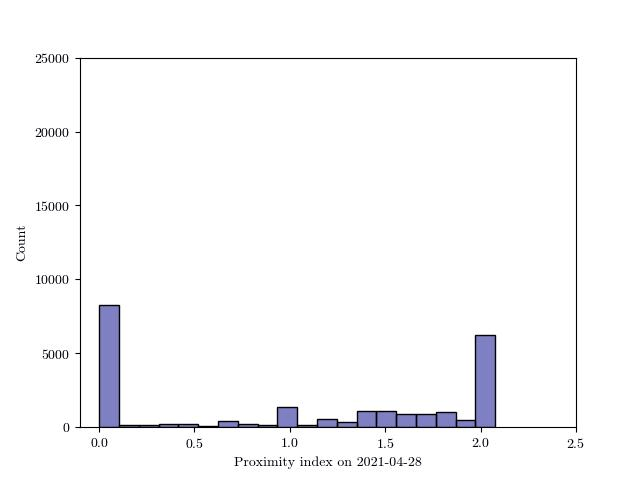

In [45]:
IPImage('../Results/izquierda_hist.gif')